In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns

from imblearn.over_sampling import SMOTE
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import accuracy_score,precision_score,f1_score,recall_score, classification_report

import tensorflow as tf
from tensorflow.keras import Sequential
from tensorflow.keras.layers import Dense



In [2]:
data = pd.read_csv("./datasets/diabetes.csv")

In [3]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
data.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [6]:
data.shape

(768, 9)

In [7]:
data.rename(columns={'DiabetesPedigreeFunction':'DPF'},inplace=True)

In [8]:
data.rename(columns={'BloodPressure':'BP',
                     'SkinThickness': 'ST'},
            inplace=True)

In [9]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   Pregnancies  768 non-null    int64  
 1   Glucose      768 non-null    int64  
 2   BP           768 non-null    int64  
 3   ST           768 non-null    int64  
 4   Insulin      768 non-null    int64  
 5   BMI          768 non-null    float64
 6   DPF          768 non-null    float64
 7   Age          768 non-null    int64  
 8   Outcome      768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [10]:
data.describe().transpose()


,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,120.894531,31.972618,0.000,99.00000,117.0000,140.25000,199.00
BP,768.0,69.105469,19.355807,0.000,62.00000,72.0000,80.00000,122.00
ST,768.0,20.536458,15.952218,0.000,0.00000,23.0000,32.00000,99.00
Insulin,768.0,79.799479,115.244002,0.000,0.00000,30.5000,127.25000,846.00
BMI,768.0,31.992578,7.884160,0.000,27.30000,32.0000,36.60000,67.10
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


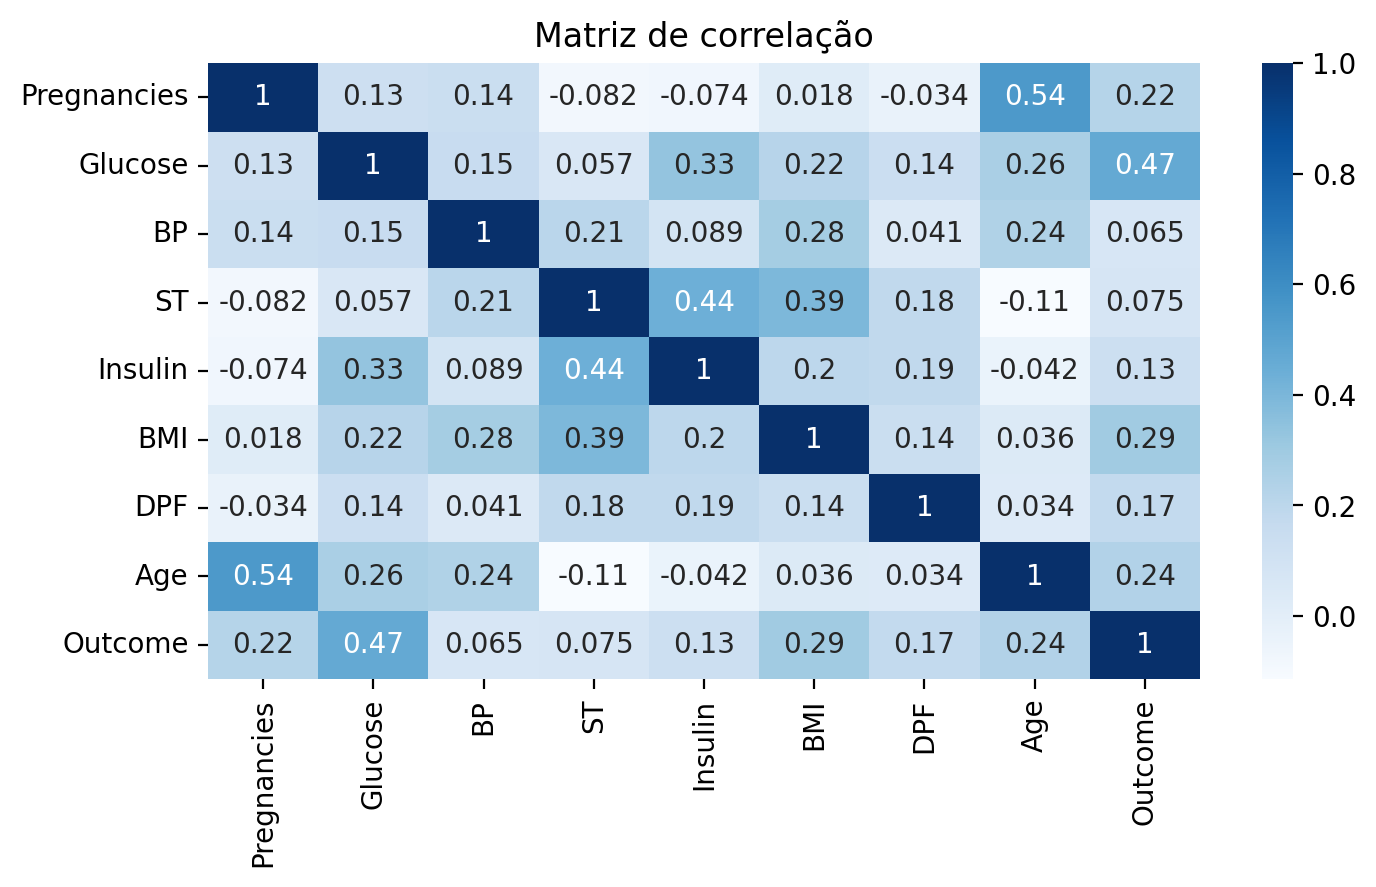

In [11]:
plt.figure(figsize=(8,4),dpi=200)
sns.heatmap(data.corr(),annot=True,cmap='Blues')
plt.title("Matriz de correlação")
plt.show()

In [12]:
data_norm = data.copy(deep=True)

In [16]:
cols_ = ['Glucose','BP','ST','Insulin','BMI']
data_norm[cols_] = data_norm[cols_].replace(0,data_norm.median())

In [17]:
data_norm.isnull().sum()

Pregnancies    0
Glucose        0
BP             0
ST             0
Insulin        0
BMI            0
DPF            0
Age            0
Outcome        0
dtype: int64

In [18]:
data_norm.describe().transpose()

,count,mean,std,min,25%,50%,75%,max
Pregnancies,768.0,3.845052,3.369578,0.000,1.00000,3.0000,6.00000,17.00
Glucose,768.0,121.656250,30.438286,44.000,99.75000,117.0000,140.25000,199.00
BP,768.0,72.386719,12.096642,24.000,64.00000,72.0000,80.00000,122.00
ST,768.0,27.334635,9.229014,7.000,23.00000,23.0000,32.00000,99.00
Insulin,768.0,94.652344,105.547598,14.000,30.50000,31.2500,127.25000,846.00
BMI,768.0,32.450911,6.875366,18.200,27.50000,32.0000,36.60000,67.10
DPF,768.0,0.471876,0.331329,0.078,0.24375,0.3725,0.62625,2.42
Age,768.0,33.240885,11.760232,21.000,24.00000,29.0000,41.00000,81.00
Outcome,768.0,0.348958,0.476951,0.000,0.00000,0.0000,1.00000,1.00


In [19]:
X = data_norm.drop('Outcome',axis=1)

In [20]:
y=data_norm['Outcome']

In [21]:
smote= SMOTE(random_state=101)

In [22]:
X_res,y_res=smote.fit_resample(X,y)

In [23]:
y_res.value_counts()

Outcome
1    500
0    500
Name: count, dtype: int64

In [25]:
X_train,X_test,y_train,y_test=train_test_split(X_res,y_res,test_size=0.3,random_state=101,stratify=y_res)

In [26]:
y_train.value_counts()

Outcome
0    350
1    350
Name: count, dtype: int64

In [27]:
sc = StandardScaler()

In [28]:
X_train = sc.fit_transform(X_train)

In [29]:
X_test = sc.transform(X_test)

In [30]:
svm = SVC()
lr = LogisticRegression()
knn = KNeighborsClassifier()
rf = RandomForestClassifier()
gb = GradientBoostingClassifier()
dt = DecisionTreeClassifier()

In [31]:
svm.fit(X_train,y_train)
lr.fit(X_train,y_train)
rf.fit(X_train,y_train)
knn.fit(X_train,y_train)
gb.fit(X_train,y_train)
dt.fit(X_train,y_train)

,criterion,'gini'
,splitter,'best'
,max_depth,None
,min_samples_split,2
,min_samples_leaf,1
,min_weight_fraction_leaf,0.0
,max_features,None
,random_state,None
,max_leaf_nodes,None
,min_impurity_decrease,0.0
,class_weight,None


In [32]:
y_pred1 = svm.predict(X_test)
y_pred2 = lr.predict(X_test)
y_pred3 = rf.predict(X_test)
y_pred4 = knn.predict(X_test)
y_pred5 = gb.predict(X_test)
y_pred6 = dt.predict(X_test)


In [33]:
print(accuracy_score(y_test,y_pred1))
print(accuracy_score(y_test,y_pred2))
print(accuracy_score(y_test,y_pred3))
print(accuracy_score(y_test,y_pred4))
print(accuracy_score(y_test,y_pred5))
print(accuracy_score(y_test,y_pred6))

0.78
0.7266666666666667
0.7966666666666666
0.7566666666666667
0.8033333333333333
0.73
